In [ ]:

def get_hyperparameter_space(prediction_length):
    """Hyperparameter space for SimpleFeedForwardEstimator with structured parameter types."""
    sff_space = {
        # --- Architecture ---
        "hidden_dimensions": {
            "type": "categorical",
            "values": [[20, 20], [40, 40], [100, 50]]
        },
        # --- Optimization ---
         "lr": {
            "type": "float",
            "low": 0.001,
            "high": 0.01,
            "log": True
        },
        "weight_decay": {
            "type": "float",
            "low": 1e-8,
            "high": 1e-4,
            "log": True
        },
        # --- Training ---
        "batch_norm": {
            "type": "categorical",
            "values": [True]
        },
        "batch_size": {
            "type": "categorical",
            "values": [32, 64]
        },
        "num_batches_per_epoch": {
            "type": "categorical",
            "values": [50, 100]
        },
        # --- Time Series Context ---
        "context_length": {
            "type": "categorical",
            "values": [5 * prediction_length, 10 * prediction_length, 15 * prediction_length]
        },
    }
    
    sff_fixed = {
        "prediction_length": prediction_length,
        "trainer_kwargs": {
            "max_epochs": 40
        }        
    }
    return sff_space, sff_fixed

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/3579055042.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/3579055042.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)


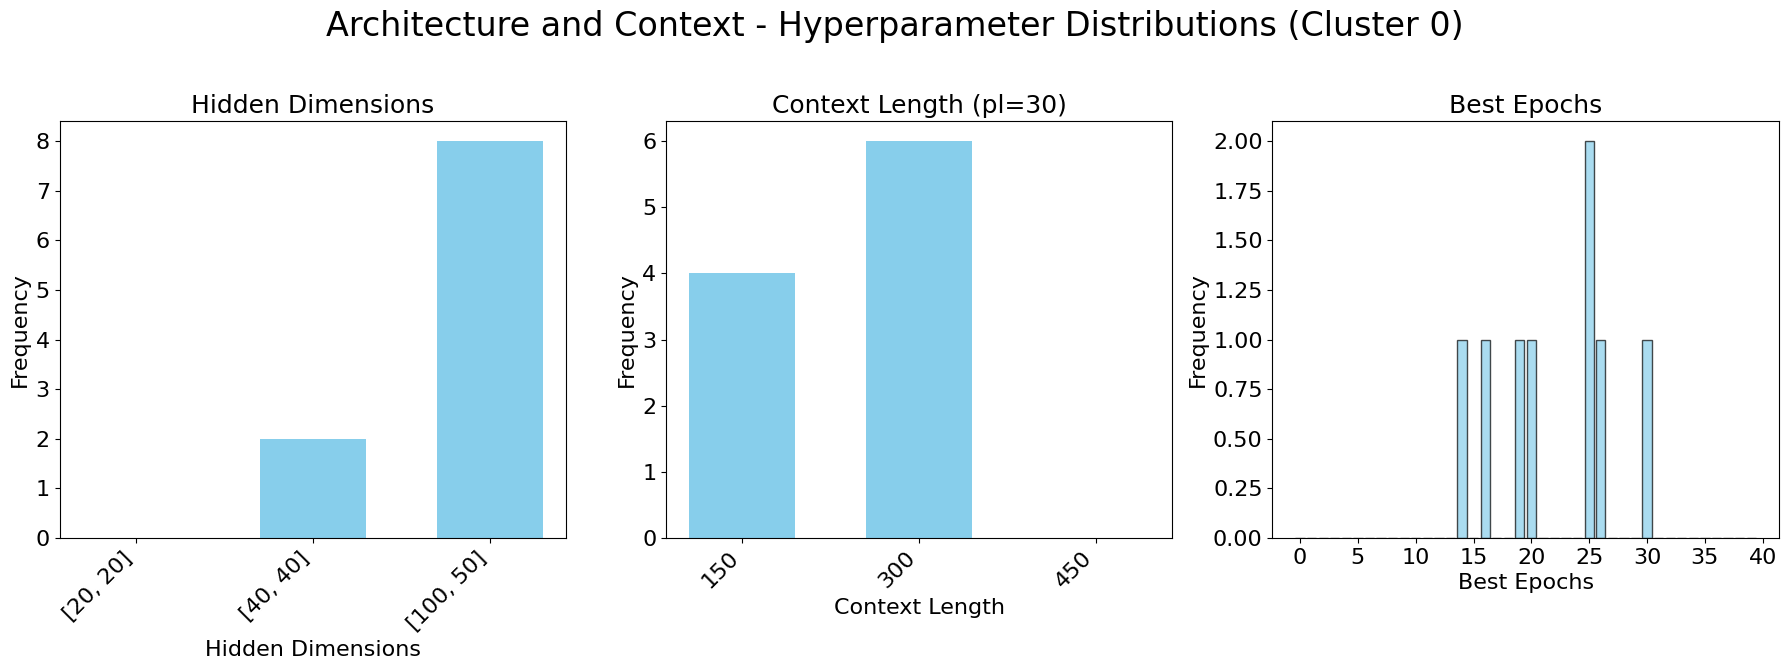

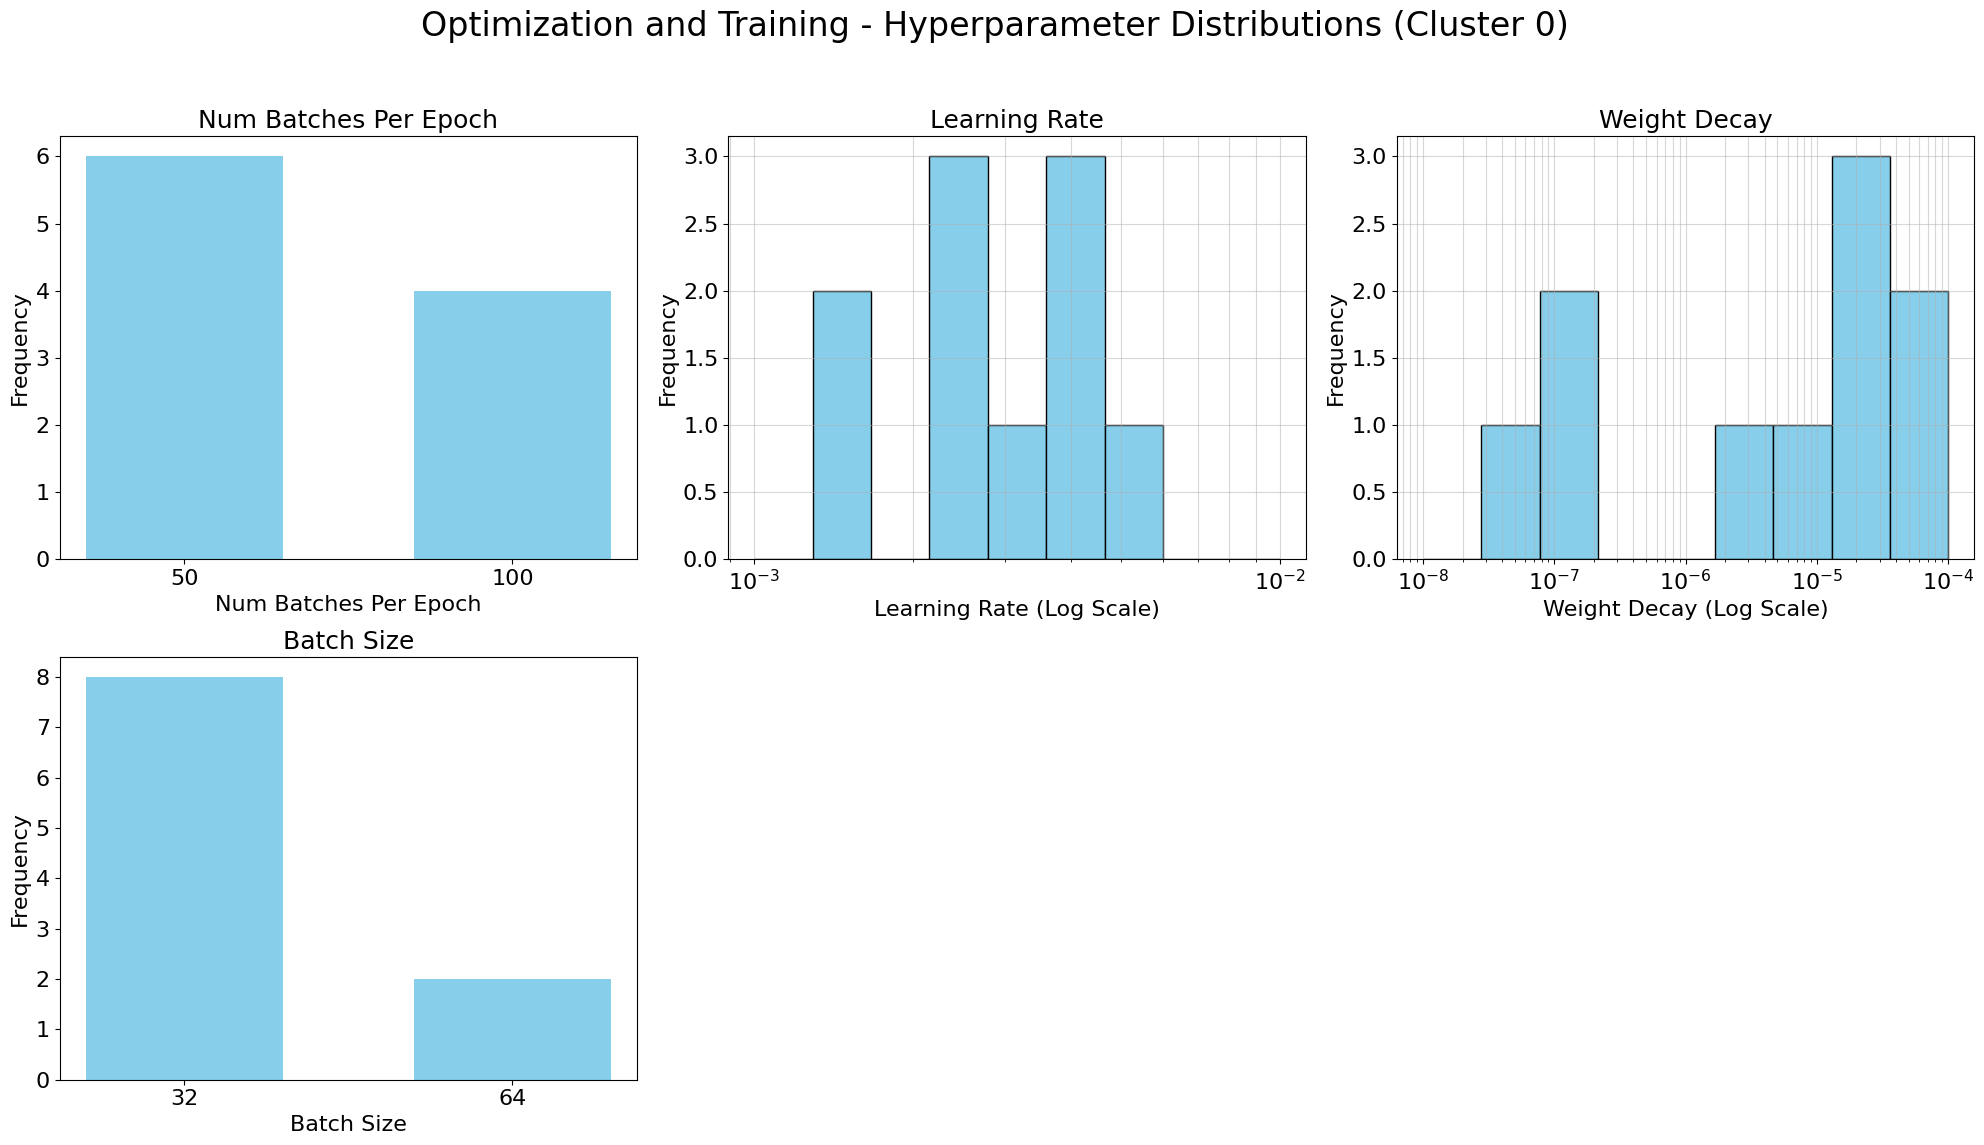

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define the hyperparameter space (for reference)
def get_hyperparameter_space(prediction_length):
    sff_space = {
        "hidden_dimensions": {"type": "categorical", "values": [[20, 20], [40, 40], [100, 50]]},
        "lr": {"type": "float", "low": 0.001, "high": 0.01, "log": True},
        "weight_decay": {"type": "float", "low": 1e-8, "high": 1e-4, "log": True},
        "batch_norm": {"type": "categorical", "values": [True]},
        "batch_size": {"type": "categorical", "values": [32, 64]},
        "num_batches_per_epoch": {"type": "categorical", "values": [50, 100]},
        "context_length": {"type": "categorical", "values": [5 * prediction_length, 10 * prediction_length, 15 * prediction_length]},
    }
    return sff_space, {"prediction_length": prediction_length, "trainer_kwargs": {"max_epochs": 40}}

# Results for Cluster 0
cluster_0_results = {
    "SKU1": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00227, "weight_decay": 1.3e-07, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_epochs": None},
    "SKU2": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00275, "weight_decay": 3.1e-08, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_epochs": 25},
    "SKU3": {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.00536, "weight_decay": 1.2e-05, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_epochs": 16},
    "SKU4": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00227, "weight_decay": 1.3e-07, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_epochs": 20},
    "SKU5": {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.00327, "weight_decay": 2.3e-06, "batch_size": 64, "num_batches_per_epoch": 50, "context_length": 300}, "best_epochs": 25},
    "SKU6": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00145, "weight_decay": 5.2e-05, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 300}, "best_epochs": 30},
    "SKU7": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00434, "weight_decay": 3.5e-05, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_epochs": 26},
    "SKU8": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00434, "weight_decay": 3.5e-05, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_epochs": None},
    "SKU9": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00145, "weight_decay": 5.2e-05, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 300}, "best_epochs": 14},
    "SKU10": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00434, "weight_decay": 3.5e-05, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_epochs": 19},
}

def plot_architecture_context(cluster_results, prediction_length):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
    fig.suptitle("Architecture and Context - Hyperparameter Distributions (Cluster 0)", fontsize=24)
    color = 'skyblue'
    text_size = 16

    # 1. Hidden Dimensions (axes[0])
    hidden_dims_optimized = [str(res["best_params"]["hidden_dimensions"]) for res in cluster_results.values()]
    hidden_dims_counts = Counter(hidden_dims_optimized)
    possible_dims = ["[20, 20]", "[40, 40]", "[100, 50]"]
    counts_hd = [hidden_dims_counts.get(dim, 0) for dim in possible_dims]
    axes[0].bar(possible_dims, counts_hd, color=color, width=0.6)
    axes[0].set_xlabel("Hidden Dimensions", fontsize=text_size)
    axes[0].set_ylabel("Frequency", fontsize=text_size)
    axes[0].set_title("Hidden Dimensions", fontsize=text_size + 2)
    axes[0].tick_params(axis='x', rotation=45, labelsize=text_size)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
    axes[0].tick_params(axis='y', labelsize=text_size)

    # 2. Context Length (axes[1])
    cl_values = [res["best_params"]["context_length"] for res in cluster_results.values()]
    cl_counts = Counter(cl_values)
    possible_cl = [5 * prediction_length, 10 * prediction_length, 15 * prediction_length]
    counts_cl = [cl_counts.get(cl, 0) for cl in possible_cl]
    axes[1].bar([str(cl) for cl in possible_cl], counts_cl, color=color, width=0.6)
    axes[1].set_xlabel("Context Length", fontsize=text_size)
    axes[1].set_ylabel("Frequency", fontsize=text_size)
    axes[1].set_title(f"Context Length (pl={prediction_length})", fontsize=text_size + 2)
    axes[1].tick_params(axis='x', rotation=45, labelsize=text_size)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)
    axes[1].tick_params(axis='y', labelsize=text_size)

    # 3. Best Epochs (axes[2])
    epoch_values = [res.get("best_epochs") for res in cluster_results.values() if res.get("best_epochs") is not None]
    if epoch_values:
        axes[2].hist(epoch_values, bins=range(41), align='left', rwidth=0.8, color=color, edgecolor='black', alpha=0.7)
        axes[2].set_xlabel("Best Epochs", fontsize=text_size)
        axes[2].set_ylabel("Frequency", fontsize=text_size)
        axes[2].set_title("Best Epochs", fontsize=text_size + 2)
        axes[2].set_xticks(range(0, 41, 5))
        axes[2].tick_params(axis='both', labelsize=text_size)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_optimization_training(cluster_results):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    fig.suptitle("Optimization and Training - Hyperparameter Distributions (Cluster 0)", fontsize=24)
    color = 'skyblue'
    text_size = 16
    bar_width = 0.6

    # 1. Num Batches Per Epoch (axes[0, 0])
    nbe_values = sorted(list(set([res["best_params"]["num_batches_per_epoch"] for res in cluster_results.values()])))
    nbe_counts = [sum(1 for res in cluster_results.values() if res["best_params"]["num_batches_per_epoch"] == val) for val in nbe_values]
    x_positions_nbe = np.arange(len(nbe_values))
    axes[0, 0].bar(x_positions_nbe, nbe_counts, color=color, width=bar_width)
    axes[0, 0].set_xlabel("Num Batches Per Epoch", fontsize=text_size)
    axes[0, 0].set_ylabel("Frequency", fontsize=text_size)
    axes[0, 0].set_title("Num Batches Per Epoch", fontsize=text_size + 2)
    axes[0, 0].set_xticks(x_positions_nbe)
    axes[0, 0].set_xticklabels(nbe_values, fontsize=text_size)
    axes[0, 0].tick_params(axis='y', labelsize=text_size)

    # 2. Learning Rate (axes[0, 1])
    lr_values = [res["best_params"]["lr"] for res in cluster_results.values()]
    lr_low = 0.001
    lr_high = 0.01
    axes[0, 1].hist(lr_values, bins=np.logspace(np.log10(lr_low), np.log10(lr_high), 10), color=color, edgecolor='black')
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_xlabel("Learning Rate (Log Scale)", fontsize=text_size)
    axes[0, 1].set_ylabel("Frequency", fontsize=text_size)
    axes[0, 1].set_title("Learning Rate", fontsize=text_size + 2)
    axes[0, 1].grid(True, which="both", ls="-", alpha=0.5)
    axes[0, 1].tick_params(axis='both', labelsize=text_size)

    # 3. Weight Decay (axes[0, 2])
    wd_values = [res["best_params"]["weight_decay"] for res in cluster_results.values()]
    wd_low = 1e-8
    wd_high = 1e-4
    axes[0, 2].hist(wd_values, bins=np.logspace(np.log10(wd_low), np.log10(wd_high), 10), color=color, edgecolor='black')
    axes[0, 2].set_xscale('log')
    axes[0, 2].set_xlabel("Weight Decay (Log Scale)", fontsize=text_size)
    axes[0, 2].set_ylabel("Frequency", fontsize=text_size)
    axes[0, 2].set_title("Weight Decay", fontsize=text_size + 2)
    axes[0, 2].grid(True, which="both", ls="-", alpha=0.5)
    axes[0, 2].tick_params(axis='both', labelsize=text_size)

    # 4. Batch Size (axes[1, 0])
    bs_values = sorted(list(set([res["best_params"]["batch_size"] for res in cluster_results.values()])))
    bs_counts = [sum(1 for res in cluster_results.values() if res["best_params"]["batch_size"] == val) for val in bs_values]
    x_positions_bs = np.arange(len(bs_values))
    axes[1, 0].bar(x_positions_bs, bs_counts, color=color, width=bar_width)
    axes[1, 0].set_xlabel("Batch Size", fontsize=text_size)
    axes[1, 0].set_ylabel("Frequency", fontsize=text_size)
    axes[1, 0].set_title("Batch Size", fontsize=text_size + 2)
    axes[1, 0].set_xticks(x_positions_bs)
    axes[1, 0].set_xticklabels(bs_values, fontsize=text_size)
    axes[1, 0].tick_params(axis='y', labelsize=text_size)

    # We leave the other two subplots empty to have 3 per row and similar sizes
    fig.delaxes(axes[1, 1])
    fig.delaxes(axes[1, 2])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage:
prediction_length_cluster_0 = 30
plot_architecture_context(cluster_0_results, prediction_length_cluster_0)
plot_optimization_training(cluster_0_results)

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/1784009635.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/1784009635.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)


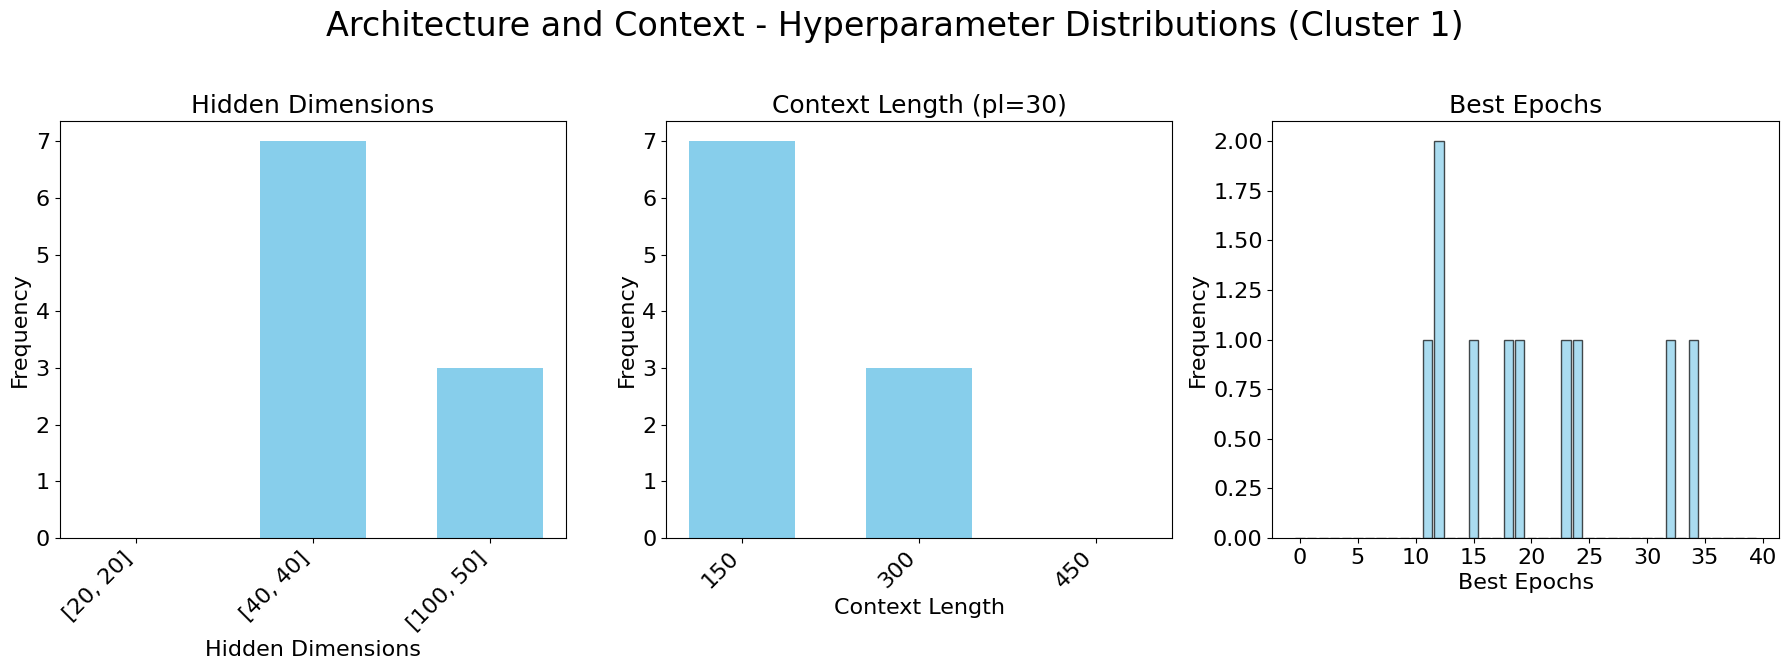

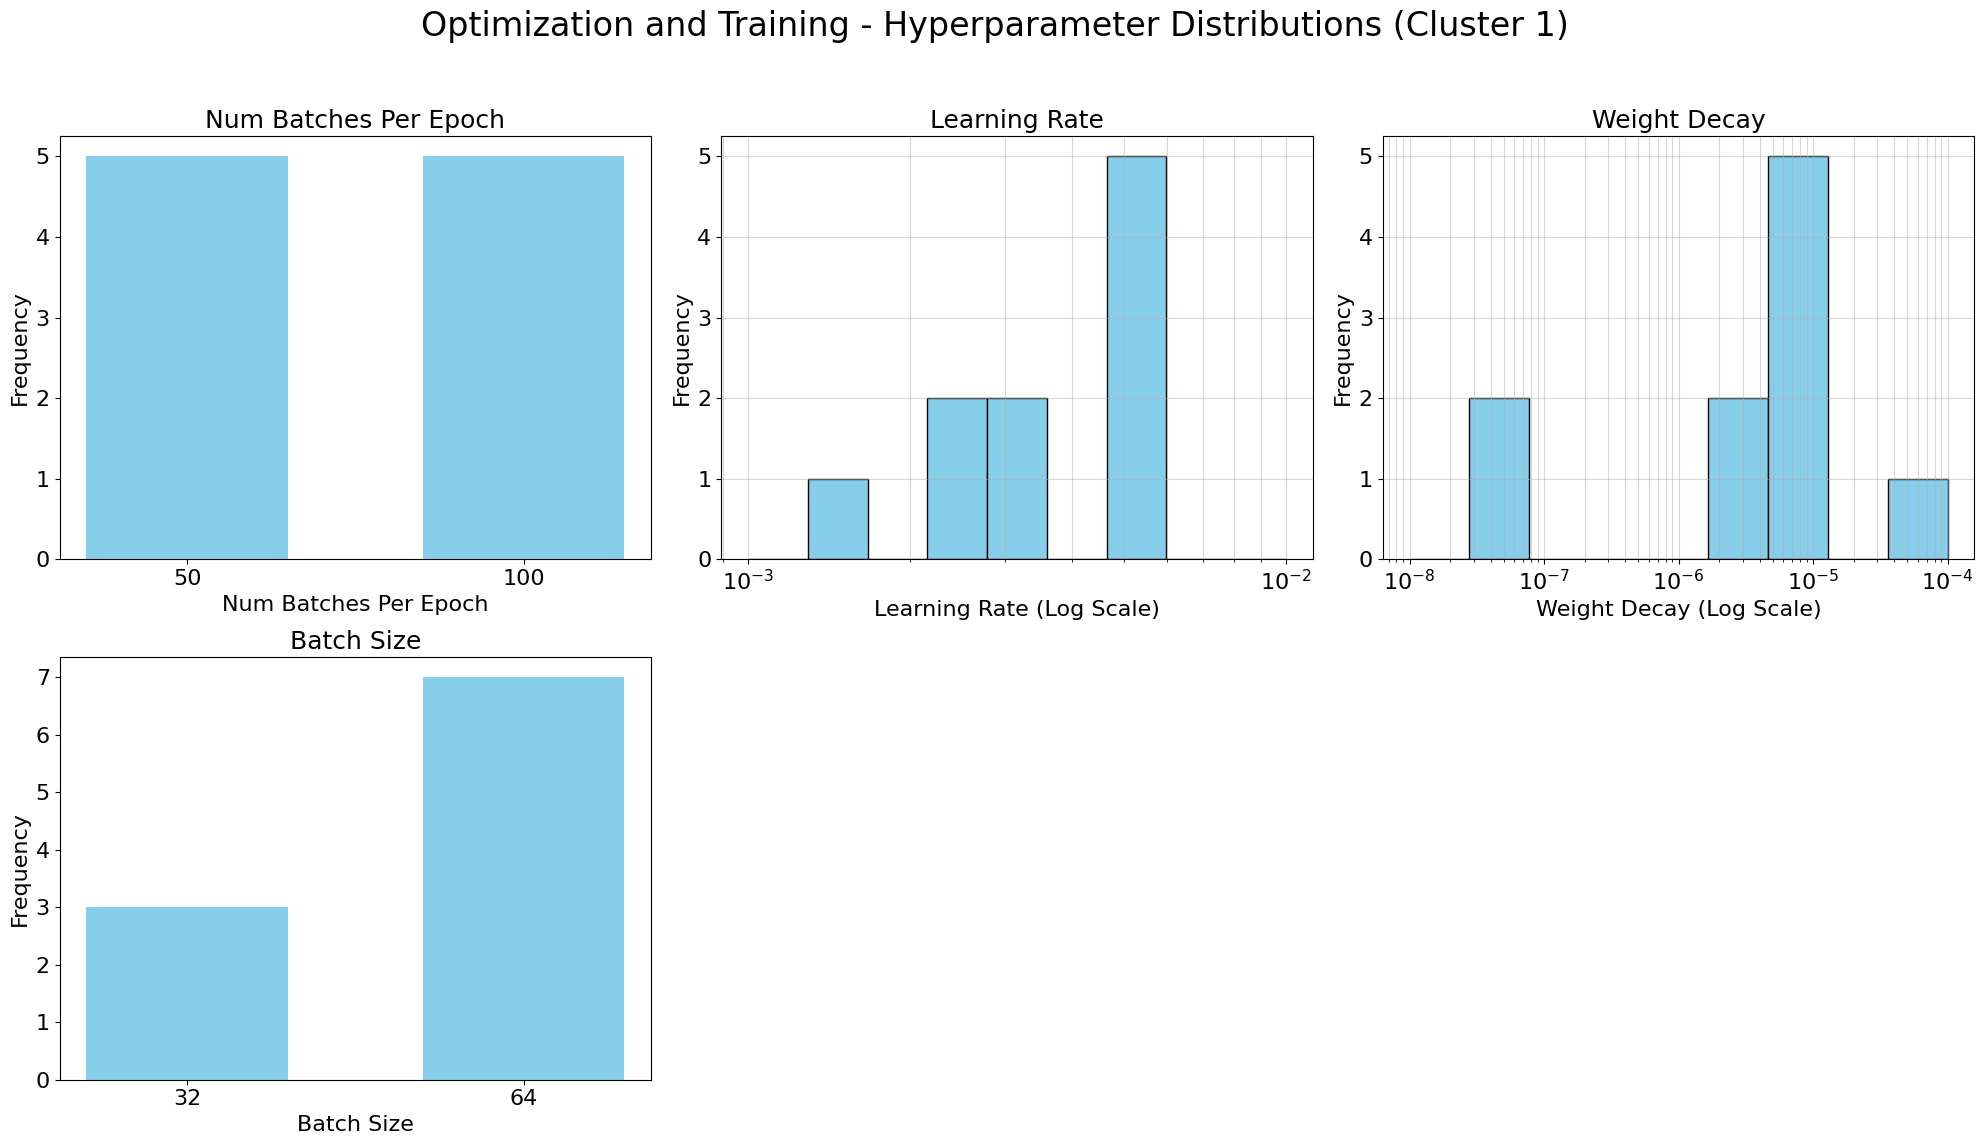

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Results for Cluster 1
cluster_1_results = {
    1: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.0032676417657817635, "weight_decay": 2.3423849847112904e-06, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 50, "context_length": 300}, "best_trial": 2, "best_epochs": 11},
    2: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 24},
    3: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.0032676417657817635, "weight_decay": 2.3423849847112904e-06, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 50, "context_length": 300}, "best_trial": 2, "best_epochs": 23},
    4: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 18},
    5: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 34},
    6: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0027551959649510785, "weight_decay": 3.0771802712506826e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 3, "best_epochs": 15},
    7: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 32},
    8: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0027551959649510785, "weight_decay": 3.0771802712506826e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 3, "best_epochs": 19},
    9: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0014495102383254683, "weight_decay": 5.2334804885400867e-05, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 300}, "best_trial": 9, "best_epochs": 12},
    10: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 12},
}

def plot_architecture_context_cluster1(cluster_results, prediction_length):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
    fig.suptitle("Architecture and Context - Hyperparameter Distributions (Cluster 1)", fontsize=24)
    color = 'skyblue'
    text_size = 16

    # 1. Hidden Dimensions (axes[0])
    hidden_dims_optimized = [str(res["best_params"]["hidden_dimensions"]) for res in cluster_results.values()]
    hidden_dims_counts = Counter(hidden_dims_optimized)
    possible_dims = ["[20, 20]", "[40, 40]", "[100, 50]"]
    counts_hd = [hidden_dims_counts.get(dim, 0) for dim in possible_dims]
    axes[0].bar(possible_dims, counts_hd, color=color, width=0.6)
    axes[0].set_xlabel("Hidden Dimensions", fontsize=text_size)
    axes[0].set_ylabel("Frequency", fontsize=text_size)
    axes[0].set_title("Hidden Dimensions", fontsize=text_size + 2)
    axes[0].tick_params(axis='x', rotation=45, labelsize=text_size)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
    axes[0].tick_params(axis='y', labelsize=text_size)

    # 2. Context Length (axes[1])
    cl_values = [res["best_params"]["context_length"] for res in cluster_results.values()]
    cl_counts = Counter(cl_values)
    possible_cl = [5 * prediction_length, 10 * prediction_length, 15 * prediction_length]
    counts_cl = [cl_counts.get(cl, 0) for cl in possible_cl]
    axes[1].bar([str(cl) for cl in possible_cl], counts_cl, color=color, width=0.6)
    axes[1].set_xlabel("Context Length", fontsize=text_size)
    axes[1].set_ylabel("Frequency", fontsize=text_size)
    axes[1].set_title(f"Context Length (pl={prediction_length})", fontsize=text_size + 2)
    axes[1].tick_params(axis='x', rotation=45, labelsize=text_size)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)
    axes[1].tick_params(axis='y', labelsize=text_size)

    # 3. Best Epochs (axes[2])
    epoch_values = [res.get("best_epochs") for res in cluster_results.values() if res.get("best_epochs") is not None]
    if epoch_values:
        axes[2].hist(epoch_values, bins=range(41), align='left', rwidth=0.8, color=color, edgecolor='black', alpha=0.7)
        axes[2].set_xlabel("Best Epochs", fontsize=text_size)
        axes[2].set_ylabel("Frequency", fontsize=text_size)
        axes[2].set_title("Best Epochs", fontsize=text_size + 2)
        axes[2].set_xticks(range(0, 41, 5))
        axes[2].tick_params(axis='both', labelsize=text_size)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_optimization_training_cluster1(cluster_results):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    fig.suptitle("Optimization and Training - Hyperparameter Distributions (Cluster 1)", fontsize=24)
    color = 'skyblue'
    text_size = 16
    bar_width = 0.6

    # 1. Num Batches Per Epoch (axes[0, 0])
    nbe_values = sorted(list(set([res["best_params"]["num_batches_per_epoch"] for res in cluster_results.values()])))
    nbe_counts = [sum(1 for res in cluster_results.values() if res["best_params"]["num_batches_per_epoch"] == val) for val in nbe_values]
    x_positions_nbe = np.arange(len(nbe_values))
    axes[0, 0].bar(x_positions_nbe, nbe_counts, color=color, width=bar_width)
    axes[0, 0].set_xlabel("Num Batches Per Epoch", fontsize=text_size)
    axes[0, 0].set_ylabel("Frequency", fontsize=text_size)
    axes[0, 0].set_title("Num Batches Per Epoch", fontsize=text_size + 2)
    axes[0, 0].set_xticks(x_positions_nbe)
    axes[0, 0].set_xticklabels(nbe_values, fontsize=text_size)
    axes[0, 0].tick_params(axis='y', labelsize=text_size)

    # 2. Learning Rate (axes[0, 1])
    lr_values = [res["best_params"]["lr"] for res in cluster_results.values()]
    lr_low = 0.001
    lr_high = 0.01
    axes[0, 1].hist(lr_values, bins=np.logspace(np.log10(lr_low), np.log10(lr_high), 10), color=color, edgecolor='black')
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_xlabel("Learning Rate (Log Scale)", fontsize=text_size)
    axes[0, 1].set_ylabel("Frequency", fontsize=text_size)
    axes[0, 1].set_title("Learning Rate", fontsize=text_size + 2)
    axes[0, 1].grid(True, which="both", ls="-", alpha=0.5)
    axes[0, 1].tick_params(axis='both', labelsize=text_size)

    # 3. Weight Decay (axes[0, 2])
    wd_values = [res["best_params"]["weight_decay"] for res in cluster_results.values()]
    wd_low = 1e-8
    wd_high = 1e-4
    axes[0, 2].hist(wd_values, bins=np.logspace(np.log10(wd_low), np.log10(wd_high), 10), color=color, edgecolor='black')
    axes[0, 2].set_xscale('log')
    axes[0, 2].set_xlabel("Weight Decay (Log Scale)", fontsize=text_size)
    axes[0, 2].set_ylabel("Frequency", fontsize=text_size)
    axes[0, 2].set_title("Weight Decay", fontsize=text_size + 2)
    axes[0, 2].grid(True, which="both", ls="-", alpha=0.5)
    axes[0, 2].tick_params(axis='both', labelsize=text_size)

    # 4. Batch Size (axes[1, 0])
    bs_values = sorted(list(set([res["best_params"]["batch_size"] for res in cluster_results.values()])))
    bs_counts = [sum(1 for res in cluster_results.values() if res["best_params"]["batch_size"] == val) for val in bs_values]
    x_positions_bs = np.arange(len(bs_values))
    axes[1, 0].bar(x_positions_bs, bs_counts, color=color, width=bar_width)
    axes[1, 0].set_xlabel("Batch Size", fontsize=text_size)
    axes[1, 0].set_ylabel("Frequency", fontsize=text_size)
    axes[1, 0].set_title("Batch Size", fontsize=text_size + 2)
    axes[1, 0].set_xticks(x_positions_bs)
    axes[1, 0].set_xticklabels(bs_values, fontsize=text_size)
    axes[1, 0].tick_params(axis='y', labelsize=text_size)

    # We leave the other two subplots empty to have 3 per row and similar sizes
    fig.delaxes(axes[1, 1])
    fig.delaxes(axes[1, 2])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage for Cluster 1:
prediction_length_cluster_1 = 30  # Assuming the same prediction length for now
plot_architecture_context_cluster1(cluster_1_results, prediction_length_cluster_1)
plot_optimization_training_cluster1(cluster_1_results)

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/3690147606.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/3690147606.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)


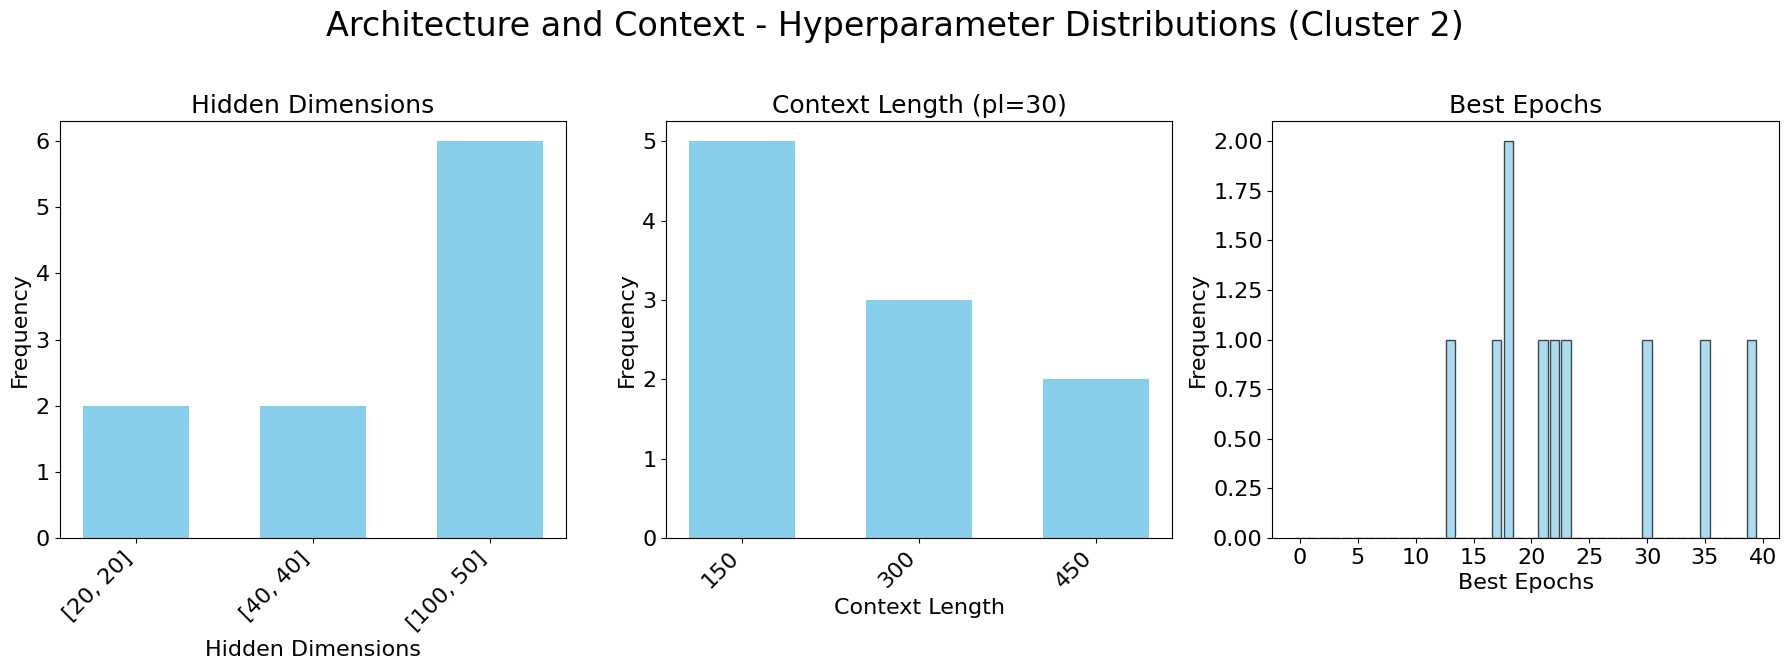

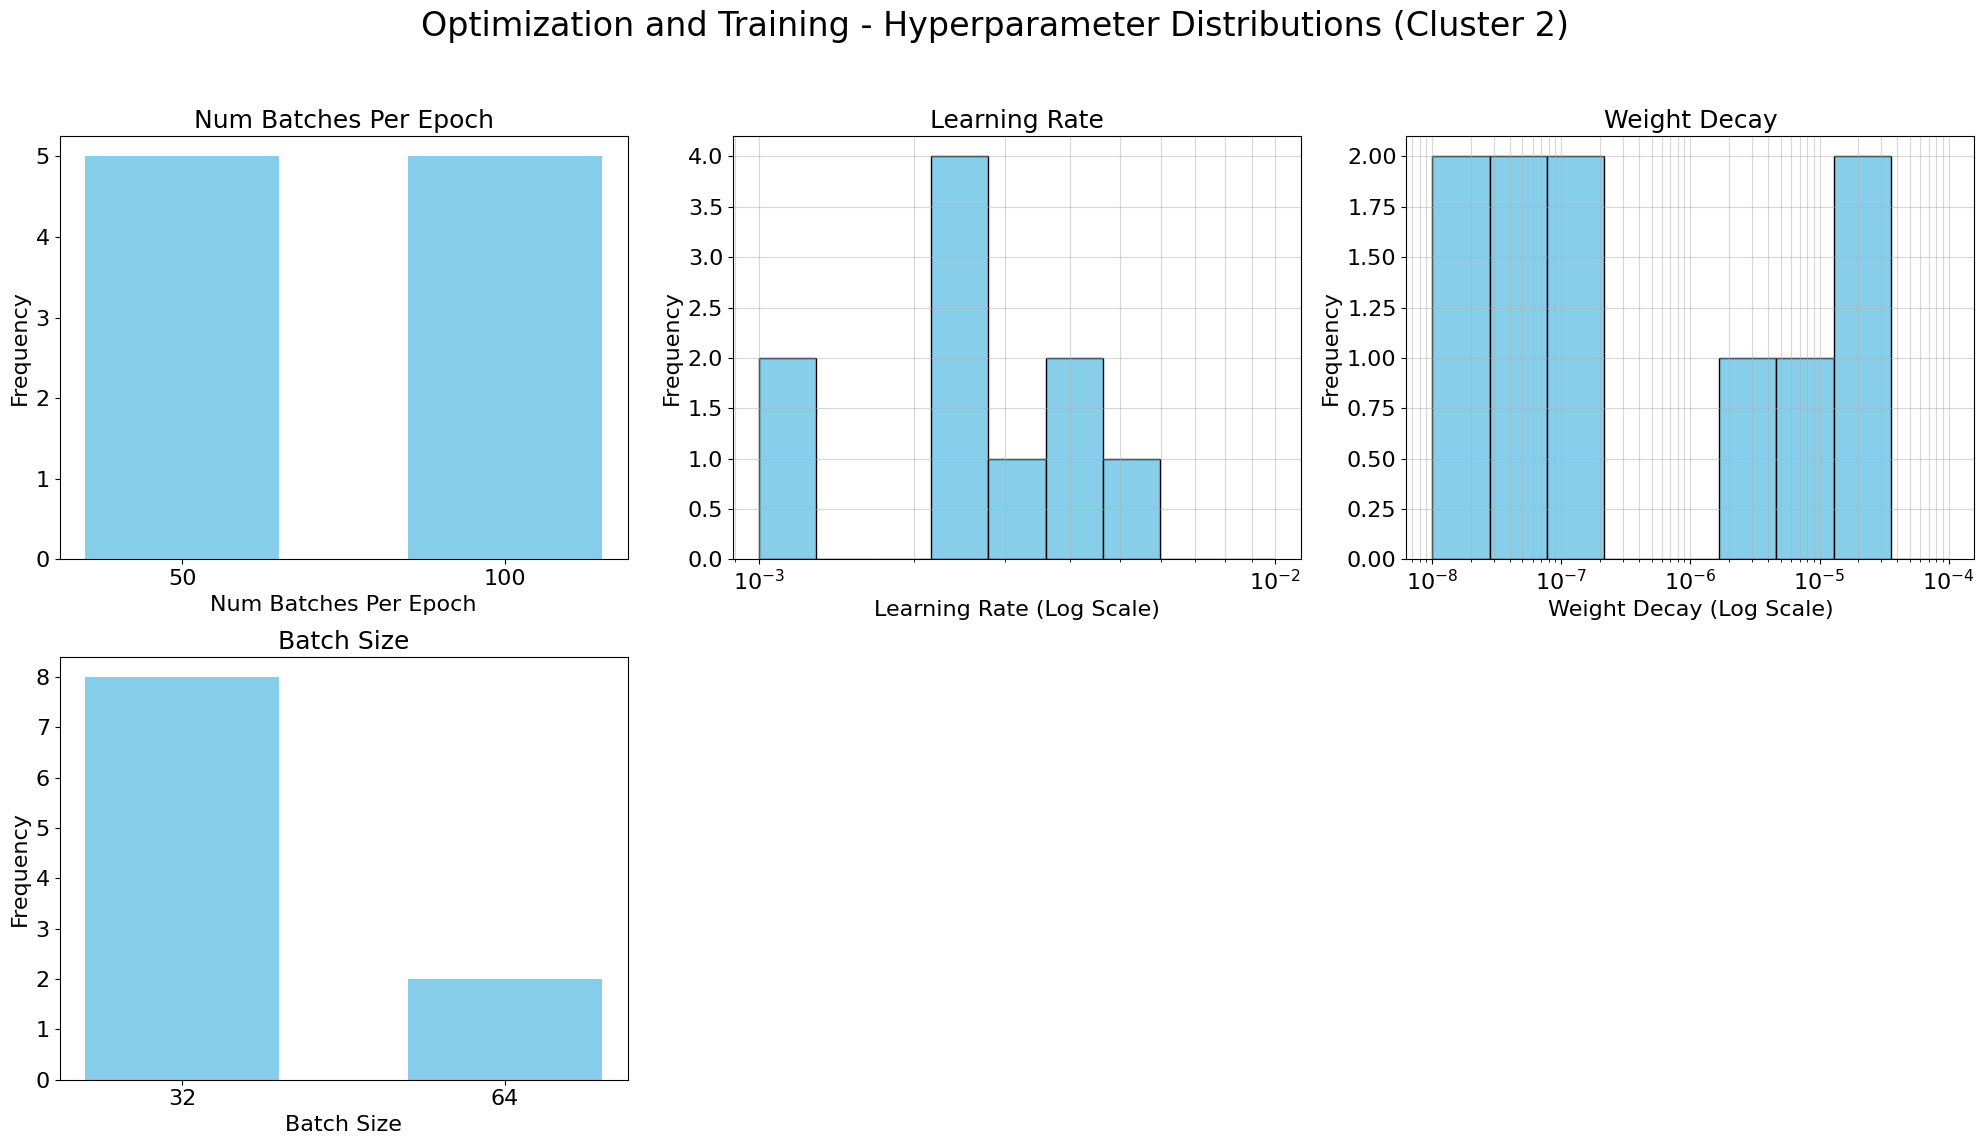

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Results for Cluster 2
cluster_2_results = {
    1: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0027551959649510785, "weight_decay": 3.0771802712506826e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 3, "best_epochs": 18},
    2: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0022738055735631833, "weight_decay": 1.3296521457299503e-07, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 5, "best_epochs": 35},
    3: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0022738055735631833, "weight_decay": 1.3296521457299503e-07, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 5, "best_epochs": 30},
    4: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0027551959649510785, "weight_decay": 3.0771802712506826e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 3, "best_epochs": 23},
    5: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 21},
    6: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.004340677011889401, "weight_decay": 3.5387588647792394e-05, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_trial": 7, "best_epochs": 17},
    7: {"best_params": {"hidden_dimensions": [20, 20], "lr": 0.0012820100418916896, "weight_decay": 1.3357240411974084e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 450}, "best_trial": 8, "best_epochs": 40},
    8: {"best_params": {"hidden_dimensions": [20, 20], "lr": 0.0012820100418916896, "weight_decay": 1.3357240411974084e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 450}, "best_trial": 8, "best_epochs": 22},
    9: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.004340677011889401, "weight_decay": 3.5387588647792394e-05, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_trial": 7, "best_epochs": 13},
    10: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.0032676417657817635, "weight_decay": 2.3423849847112904e-06, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 50, "context_length": 300}, "best_trial": 2, "best_epochs": 18},
}

def plot_architecture_context_cluster2(cluster_results, prediction_length):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
    fig.suptitle("Architecture and Context - Hyperparameter Distributions (Cluster 2)", fontsize=24)
    color = 'skyblue'
    text_size = 16

    # 1. Hidden Dimensions (axes[0])
    hidden_dims_optimized = [str(res["best_params"]["hidden_dimensions"]) for res in cluster_results.values()]
    hidden_dims_counts = Counter(hidden_dims_optimized)
    possible_dims = ["[20, 20]", "[40, 40]", "[100, 50]"]
    counts_hd = [hidden_dims_counts.get(dim, 0) for dim in possible_dims]
    axes[0].bar(possible_dims, counts_hd, color=color, width=0.6)
    axes[0].set_xlabel("Hidden Dimensions", fontsize=text_size)
    axes[0].set_ylabel("Frequency", fontsize=text_size)
    axes[0].set_title("Hidden Dimensions", fontsize=text_size + 2)
    axes[0].tick_params(axis='x', rotation=45, labelsize=text_size)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
    axes[0].tick_params(axis='y', labelsize=text_size)

    # 2. Context Length (axes[1])
    cl_values = [res["best_params"]["context_length"] for res in cluster_results.values()]
    cl_counts = Counter(cl_values)
    possible_cl = [5 * prediction_length, 10 * prediction_length, 15 * prediction_length]
    counts_cl = [cl_counts.get(cl, 0) for cl in possible_cl]
    axes[1].bar([str(cl) for cl in possible_cl], counts_cl, color=color, width=0.6)
    axes[1].set_xlabel("Context Length", fontsize=text_size)
    axes[1].set_ylabel("Frequency", fontsize=text_size)
    axes[1].set_title(f"Context Length (pl={prediction_length})", fontsize=text_size + 2)
    axes[1].tick_params(axis='x', rotation=45, labelsize=text_size)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)
    axes[1].tick_params(axis='y', labelsize=text_size)

    # 3. Best Epochs (axes[2])
    epoch_values = [res.get("best_epochs") for res in cluster_results.values() if res.get("best_epochs") is not None]
    if epoch_values:
        axes[2].hist(epoch_values, bins=range(41), align='left', rwidth=0.8, color=color, edgecolor='black', alpha=0.7)
        axes[2].set_xlabel("Best Epochs", fontsize=text_size)
        axes[2].set_ylabel("Frequency", fontsize=text_size)
        axes[2].set_title("Best Epochs", fontsize=text_size + 2)
        axes[2].set_xticks(range(0, 41, 5))
        axes[2].tick_params(axis='both', labelsize=text_size)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_optimization_training_cluster2(cluster_results):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    fig.suptitle("Optimization and Training - Hyperparameter Distributions (Cluster 2)", fontsize=24)
    color = 'skyblue'
    text_size = 16
    bar_width = 0.6

    # 1. Num Batches Per Epoch (axes[0, 0])
    nbe_values = sorted(list(set([res["best_params"]["num_batches_per_epoch"] for res in cluster_results.values()])))
    nbe_counts = [sum(1 for res in cluster_results.values() if res["best_params"]["num_batches_per_epoch"] == val) for val in nbe_values]
    x_positions_nbe = np.arange(len(nbe_values))
    axes[0, 0].bar(x_positions_nbe, nbe_counts, color=color, width=bar_width)
    axes[0, 0].set_xlabel("Num Batches Per Epoch", fontsize=text_size)
    axes[0, 0].set_ylabel("Frequency", fontsize=text_size)
    axes[0, 0].set_title("Num Batches Per Epoch", fontsize=text_size + 2)
    axes[0, 0].set_xticks(x_positions_nbe)
    axes[0, 0].set_xticklabels(nbe_values, fontsize=text_size)
    axes[0, 0].tick_params(axis='y', labelsize=text_size)

    # 2. Learning Rate (axes[0, 1])
    lr_values = [res["best_params"]["lr"] for res in cluster_results.values()]
    lr_low = 0.001
    lr_high = 0.01
    axes[0, 1].hist(lr_values, bins=np.logspace(np.log10(lr_low), np.log10(lr_high), 10), color=color, edgecolor='black')
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_xlabel("Learning Rate (Log Scale)", fontsize=text_size)
    axes[0, 1].set_ylabel("Frequency", fontsize=text_size)
    axes[0, 1].set_title("Learning Rate", fontsize=text_size + 2)
    axes[0, 1].grid(True, which="both", ls="-", alpha=0.5)
    axes[0, 1].tick_params(axis='both', labelsize=text_size)

    # 3. Weight Decay (axes[0, 2])
    wd_values = [res["best_params"]["weight_decay"] for res in cluster_results.values()]
    wd_low = 1e-8
    wd_high = 1e-4
    axes[0, 2].hist(wd_values, bins=np.logspace(np.log10(wd_low), np.log10(wd_high), 10), color=color, edgecolor='black')
    axes[0, 2].set_xscale('log')
    axes[0, 2].set_xlabel("Weight Decay (Log Scale)", fontsize=text_size)
    axes[0, 2].set_ylabel("Frequency", fontsize=text_size)
    axes[0, 2].set_title("Weight Decay", fontsize=text_size + 2)
    axes[0, 2].grid(True, which="both", ls="-", alpha=0.5)
    axes[0, 2].tick_params(axis='both', labelsize=text_size)

    # 4. Batch Size (axes[1, 0])
    bs_values = sorted(list(set([res["best_params"]["batch_size"] for res in cluster_results.values()])))
    bs_counts = [sum(1 for res in cluster_results.values() if res["best_params"]["batch_size"] == val) for val in bs_values]
    x_positions_bs = np.arange(len(bs_values))
    axes[1, 0].bar(x_positions_bs, bs_counts, color=color, width=bar_width)
    axes[1, 0].set_xlabel("Batch Size", fontsize=text_size)
    axes[1, 0].set_ylabel("Frequency", fontsize=text_size)
    axes[1, 0].set_title("Batch Size", fontsize=text_size + 2)
    axes[1, 0].set_xticks(x_positions_bs)
    axes[1, 0].set_xticklabels(bs_values, fontsize=text_size)
    axes[1, 0].tick_params(axis='y', labelsize=text_size)

    # We leave the other two subplots empty to have 3 per row and similar sizes
    fig.delaxes(axes[1, 1])
    fig.delaxes(axes[1, 2])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage for Cluster 2:
prediction_length_cluster_2 = 30  # Assuming the same prediction length for now
plot_architecture_context_cluster2(cluster_2_results, prediction_length_cluster_2)
plot_optimization_training_cluster2(cluster_2_results)

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/1207333680.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/1207333680.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)


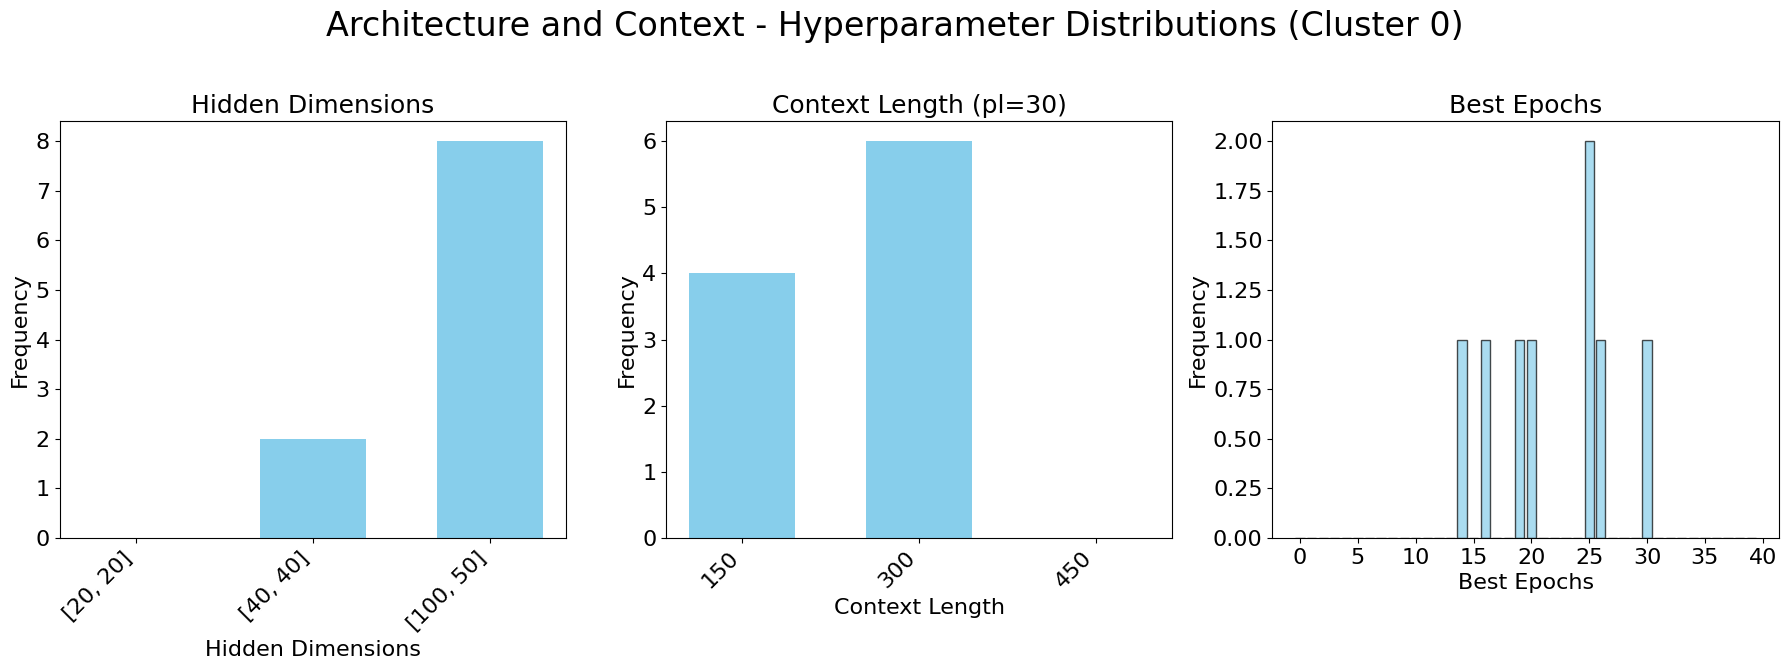

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/1207333680.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/1207333680.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)


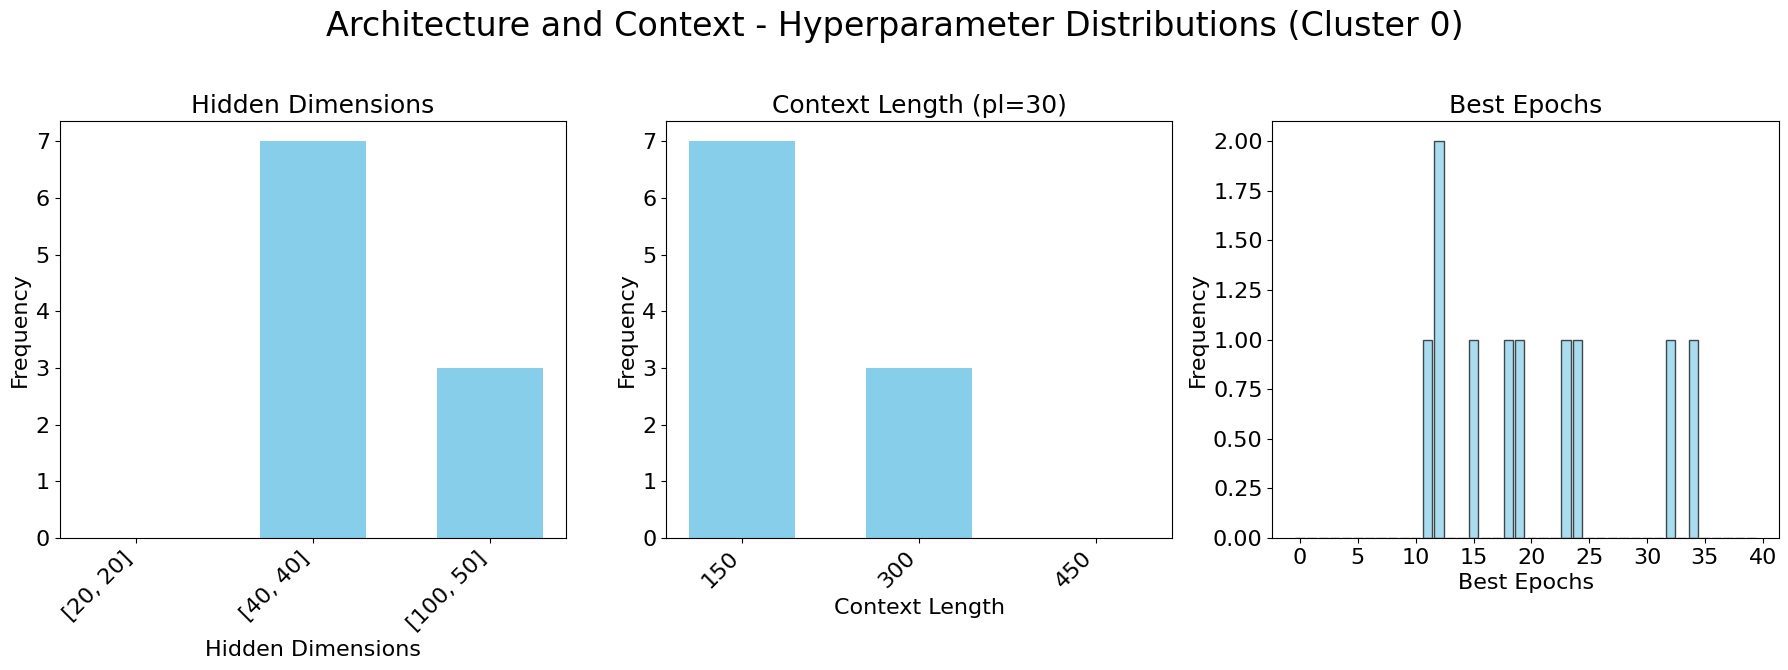

/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/1207333680.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
/var/folders/g4/21kk_yqn4h75mgg_8hcjcsx80000gn/T/ipykernel_91830/1207333680.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)


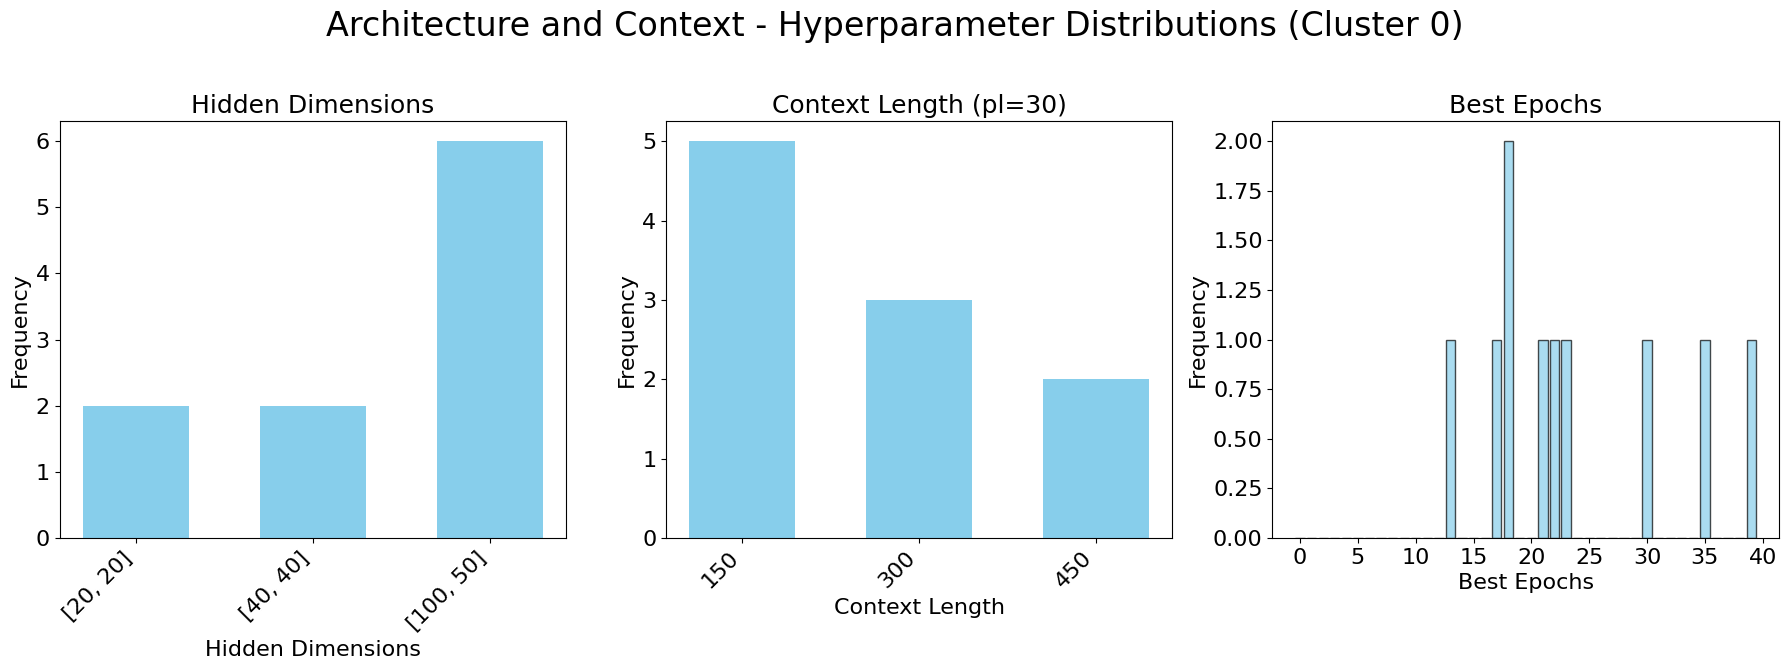

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define the hyperparameter space (for reference)
def get_hyperparameter_space(prediction_length):
    sff_space = {
        "hidden_dimensions": {"type": "categorical", "values": [[20, 20], [40, 40], [100, 50]]},
        "lr": {"type": "float", "low": 0.001, "high": 0.01, "log": True},
        "weight_decay": {"type": "float", "low": 1e-8, "high": 1e-4, "log": True},
        "batch_norm": {"type": "categorical", "values": [True]},
        "batch_size": {"type": "categorical", "values": [32, 64]},
        "num_batches_per_epoch": {"type": "categorical", "values": [50, 100]},
        "context_length": {"type": "categorical", "values": [5 * prediction_length, 10 * prediction_length, 15 * prediction_length]},
    }
    return sff_space, {"prediction_length": prediction_length, "trainer_kwargs": {"max_epochs": 40}}


def plot_architecture_context(cluster_results, prediction_length):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))
    fig.suptitle("Architecture and Context - Hyperparameter Distributions (Cluster 0)", fontsize=24)
    color = 'skyblue'
    text_size = 16

    # 1. Hidden Dimensions (axes[0])
    hidden_dims_optimized = [str(res["best_params"]["hidden_dimensions"]) for res in cluster_results.values()]
    hidden_dims_counts = Counter(hidden_dims_optimized)
    possible_dims = ["[20, 20]", "[40, 40]", "[100, 50]"]
    counts_hd = [hidden_dims_counts.get(dim, 0) for dim in possible_dims]
    axes[0].bar(possible_dims, counts_hd, color=color, width=0.6)
    axes[0].set_xlabel("Hidden Dimensions", fontsize=text_size)
    axes[0].set_ylabel("Frequency", fontsize=text_size)
    axes[0].set_title("Hidden Dimensions", fontsize=text_size + 2)
    axes[0].tick_params(axis='x', rotation=45, labelsize=text_size)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right', fontsize=text_size)
    axes[0].tick_params(axis='y', labelsize=text_size)

    # 2. Context Length (axes[1])
    cl_values = [res["best_params"]["context_length"] for res in cluster_results.values()]
    cl_counts = Counter(cl_values)
    possible_cl = [5 * prediction_length, 10 * prediction_length, 15 * prediction_length]
    counts_cl = [cl_counts.get(cl, 0) for cl in possible_cl]
    axes[1].bar([str(cl) for cl in possible_cl], counts_cl, color=color, width=0.6)
    axes[1].set_xlabel("Context Length", fontsize=text_size)
    axes[1].set_ylabel("Frequency", fontsize=text_size)
    axes[1].set_title(f"Context Length (pl={prediction_length})", fontsize=text_size + 2)
    axes[1].tick_params(axis='x', rotation=45, labelsize=text_size)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right', fontsize=text_size)
    axes[1].tick_params(axis='y', labelsize=text_size)

    # 3. Best Epochs (axes[2])
    epoch_values = [res.get("best_epochs") for res in cluster_results.values() if res.get("best_epochs") is not None]
    if epoch_values:
        axes[2].hist(epoch_values, bins=range(41), align='left', rwidth=0.8, color=color, edgecolor='black', alpha=0.7)
        axes[2].set_xlabel("Best Epochs", fontsize=text_size)
        axes[2].set_ylabel("Frequency", fontsize=text_size)
        axes[2].set_title("Best Epochs", fontsize=text_size + 2)
        axes[2].set_xticks(range(0, 41, 5))
        axes[2].tick_params(axis='both', labelsize=text_size)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Results for Cluster 0
cluster_0_results = {
    "SKU1": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00227, "weight_decay": 1.3e-07, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_epochs": None},
    "SKU2": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00275, "weight_decay": 3.1e-08, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_epochs": 25},
    "SKU3": {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.00536, "weight_decay": 1.2e-05, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_epochs": 16},
    "SKU4": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00227, "weight_decay": 1.3e-07, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_epochs": 20},
    "SKU5": {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.00327, "weight_decay": 2.3e-06, "batch_size": 64, "num_batches_per_epoch": 50, "context_length": 300}, "best_epochs": 25},
    "SKU6": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00145, "weight_decay": 5.2e-05, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 300}, "best_epochs": 30},
    "SKU7": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00434, "weight_decay": 3.5e-05, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_epochs": 26},
    "SKU8": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00434, "weight_decay": 3.5e-05, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_epochs": None},
    "SKU9": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00145, "weight_decay": 5.2e-05, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 300}, "best_epochs": 14},
    "SKU10": {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.00434, "weight_decay": 3.5e-05, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_epochs": 19},
}

# Results for Cluster 1
cluster_1_results = {
    1: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.0032676417657817635, "weight_decay": 2.3423849847112904e-06, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 50, "context_length": 300}, "best_trial": 2, "best_epochs": 11},
    2: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 24},
    3: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.0032676417657817635, "weight_decay": 2.3423849847112904e-06, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 50, "context_length": 300}, "best_trial": 2, "best_epochs": 23},
    4: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 18},
    5: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 34},
    6: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0027551959649510785, "weight_decay": 3.0771802712506826e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 3, "best_epochs": 15},
    7: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 32},
    8: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0027551959649510785, "weight_decay": 3.0771802712506826e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 3, "best_epochs": 19},
    9: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0014495102383254683, "weight_decay": 5.2334804885400867e-05, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 300}, "best_trial": 9, "best_epochs": 12},
    10: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 12},
}

# Results for Cluster 2
cluster_2_results = {
    1: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0027551959649510785, "weight_decay": 3.0771802712506826e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 3, "best_epochs": 18},
    2: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0022738055735631833, "weight_decay": 1.3296521457299503e-07, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 5, "best_epochs": 35},
    3: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0022738055735631833, "weight_decay": 1.3296521457299503e-07, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 5, "best_epochs": 30},
    4: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.0027551959649510785, "weight_decay": 3.0771802712506826e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 50, "context_length": 150}, "best_trial": 3, "best_epochs": 23},
    5: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.005358055009231867, "weight_decay": 1.2164139351417062e-05, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 100, "context_length": 150}, "best_trial": 6, "best_epochs": 21},
    6: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.004340677011889401, "weight_decay": 3.5387588647792394e-05, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_trial": 7, "best_epochs": 17},
    7: {"best_params": {"hidden_dimensions": [20, 20], "lr": 0.0012820100418916896, "weight_decay": 1.3357240411974084e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 450}, "best_trial": 8, "best_epochs": 40},
    8: {"best_params": {"hidden_dimensions": [20, 20], "lr": 0.0012820100418916896, "weight_decay": 1.3357240411974084e-08, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 450}, "best_trial": 8, "best_epochs": 22},
    9: {"best_params": {"hidden_dimensions": [100, 50], "lr": 0.004340677011889401, "weight_decay": 3.5387588647792394e-05, "batch_norm": True, "batch_size": 32, "num_batches_per_epoch": 100, "context_length": 300}, "best_trial": 7, "best_epochs": 13},
    10: {"best_params": {"hidden_dimensions": [40, 40], "lr": 0.0032676417657817635, "weight_decay": 2.3423849847112904e-06, "batch_norm": True, "batch_size": 64, "num_batches_per_epoch": 50, "context_length": 300}, "best_trial": 2, "best_epochs": 18},
}

# Example usage for Cluster 0:
prediction_length_cluster_0 = 30  # Assuming the same prediction length for now
plot_architecture_context(cluster_0_results, prediction_length_cluster_0)
plot_architecture_context(cluster_1_results, prediction_length_cluster_0)
plot_architecture_context(cluster_2_results, prediction_length_cluster_0)

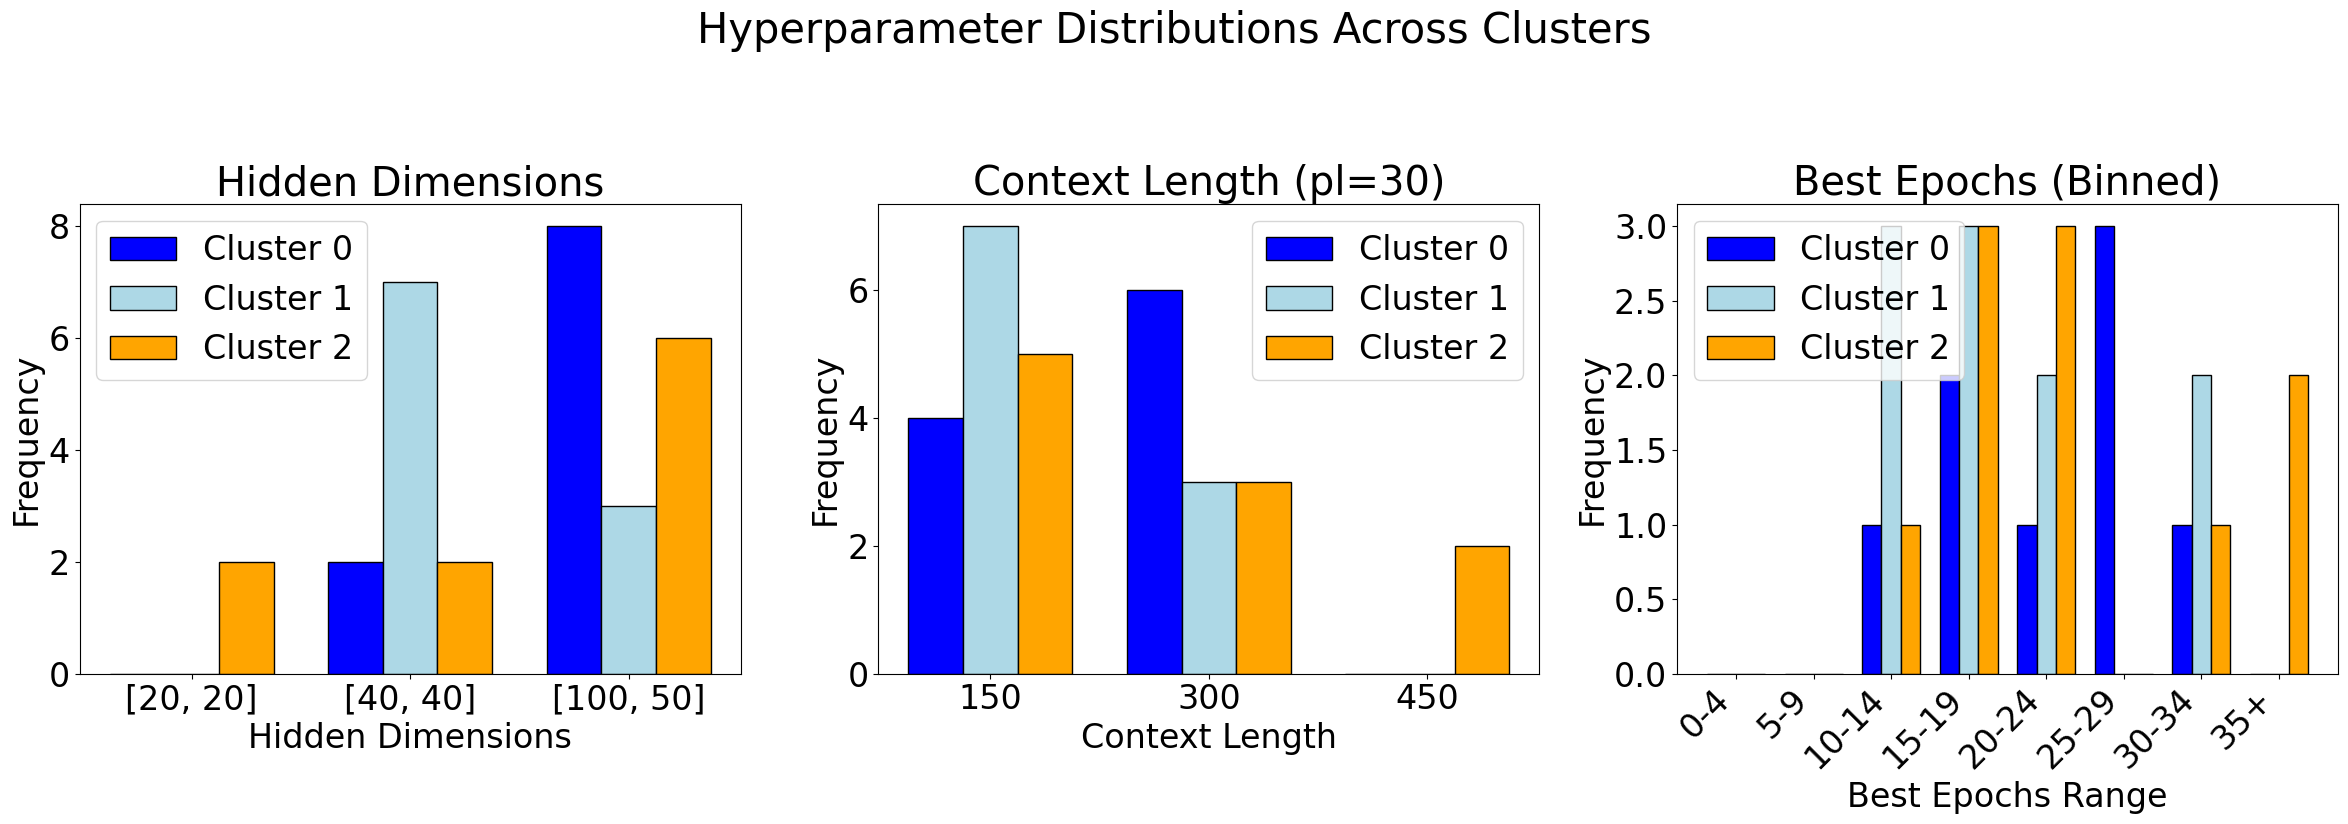

In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from collections import Counter

# Set global font size
mpl.rcParams.update({'font.size': 24})

def plot_all_clusters(cluster_0_results, cluster_1_results, cluster_2_results, prediction_length):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
    text_size = 24
    fig.suptitle("Hyperparameter Distributions Across Clusters", fontsize=text_size + 6, y=1.05)
    
    # Define colors
    colors = {
        'Cluster 0': 'blue',
        'Cluster 1': 'lightblue',
        'Cluster 2': 'orange'
    }
    
    bar_width = 0.25
    x_positions = np.arange(3)  # For categorical plots
    
    all_results = {
        'Cluster 0': cluster_0_results,
        'Cluster 1': cluster_1_results,
        'Cluster 2': cluster_2_results
    }
    
    # 1. Hidden Dimensions Plot
    possible_dims = ["[20, 20]", "[40, 40]", "[100, 50]"]
    hd_data = {}
    for cluster_name, results in all_results.items():
        hidden_dims = [str(res["best_params"]["hidden_dimensions"]) for res in results.values()]
        counts = [hidden_dims.count(dim) for dim in possible_dims]
        hd_data[cluster_name] = counts
    
    for i, (cluster_name, counts) in enumerate(hd_data.items()):
        axes[0].bar(x_positions + i*bar_width, counts, width=bar_width, 
                    color=colors[cluster_name], label=cluster_name, edgecolor='black')
    
    axes[0].set_xticks(x_positions + bar_width)
    axes[0].set_xticklabels(possible_dims)
    axes[0].set_xlabel("Hidden Dimensions")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Hidden Dimensions")
    axes[0].tick_params(axis='both', labelsize=text_size)
    axes[0].legend(fontsize=text_size)
    
    # 2. Context Length Plot
    possible_cl = [5*prediction_length, 10*prediction_length, 15*prediction_length]
    cl_data = {}
    for cluster_name, results in all_results.items():
        cl_values = [res["best_params"]["context_length"] for res in results.values()]
        counts = [cl_values.count(cl) for cl in possible_cl]
        cl_data[cluster_name] = counts
    
    for i, (cluster_name, counts) in enumerate(cl_data.items()):
        axes[1].bar(x_positions + i*bar_width, counts, width=bar_width, 
                    color=colors[cluster_name], label=cluster_name, edgecolor='black')
    
    axes[1].set_xticks(x_positions + bar_width)
    axes[1].set_xticklabels([str(cl) for cl in possible_cl])
    axes[1].set_xlabel("Context Length")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title(f"Context Length (pl={prediction_length})")
    axes[1].tick_params(axis='both', labelsize=text_size)
    axes[1].legend(fontsize=text_size)

    # 3. Best Epochs Plot
    bin_edges = range(0, 41, 5)
    epoch_data = {}
    for cluster_name, results in all_results.items():
        epochs = [res.get("best_epochs") for res in results.values() if res.get("best_epochs") is not None]
        binned_counts = np.histogram(epochs, bins=bin_edges)[0]
        epoch_data[cluster_name] = binned_counts
    
    x_pos = np.arange(len(bin_edges)-1)
    x_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])-1}" for i in range(len(bin_edges)-1)]
    x_labels[-1] = f"{int(bin_edges[-2])}+"
    
    for i, (cluster_name, counts) in enumerate(epoch_data.items()):
        axes[2].bar(x_pos + i*bar_width, counts, width=bar_width,
                    color=colors[cluster_name], label=cluster_name, edgecolor='black')
    
    axes[2].set_xticks(x_pos + bar_width)
    axes[2].set_xticklabels(x_labels, rotation=45, ha='right')
    axes[2].set_xlabel("Best Epochs Range")
    axes[2].set_ylabel("Frequency")
    axes[2].set_title("Best Epochs (Binned)")
    axes[2].tick_params(axis='both', labelsize=text_size)
    axes[2].legend(fontsize=text_size)

    plt.tight_layout()
    plt.show()
prediction_length = 30
plot_all_clusters(cluster_0_results, cluster_1_results, cluster_2_results, prediction_length)